In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
from scipy.optimize import minimize

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
import package_LAB
from package_LAB import LeadLag_RT, PID_RT

from importlib import reload
package_LAB = reload(package_LAB)

LeadLag Implementation

In [12]:
help(LeadLag_RT)

Help on function LeadLag_RT in module package_LAB:

LeadLag_RT(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    Help on function LeadLag_RT in module package_DBR Advanced:
        LeadLag RT(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method=" EBD")
        
        The function “LeadLag RT” needs to be included in a ”for or while loop”.
        :MV: input vector
        :Kp: process gain
        :Tlead: lead time constant [s]
        :Tlag: lag time constant [s]
        :Ts:sampling period [s]
        :Pv: output vector
        :PVInit: (optional: default value is 8)
        :method: discretisation method (optional: default value is "EBD')
                EBD: Euler Backward difference
                EFD: Euler Forward difference
                TRAP: Trapezoidal method
        The function appends a value to the output vector "Pv".
        The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0, 100)

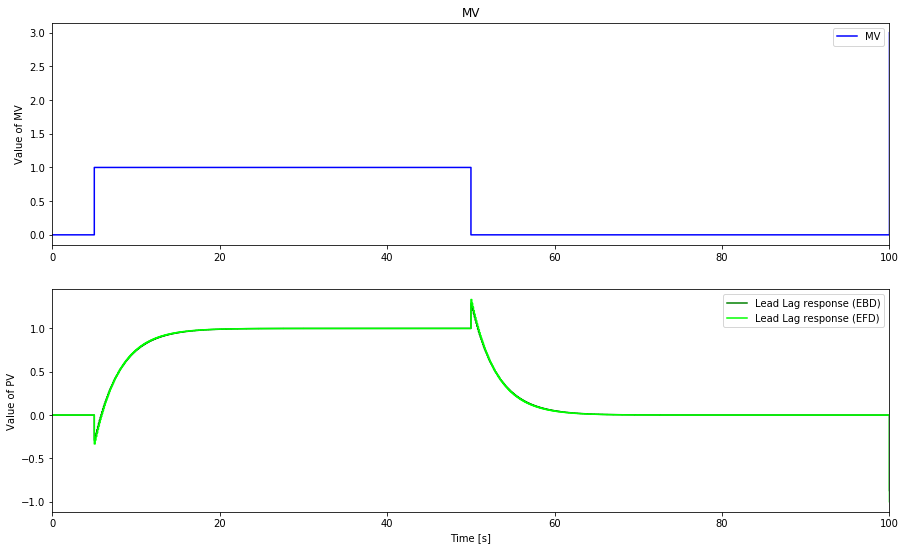

In [13]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 0, TSim: 3}

t = []
MV = []
PV_EBD = []
PV_EFD = []

# Parameters
Kp = 1
TLead = -1
TLag = 3

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    LeadLag_RT(MV, Kp, TLead, TLag, Ts, PV_EBD,0," EBD")
    LeadLag_RT(MV, Kp, TLead, TLag, Ts, PV_EFD,0,'EFD')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('MV')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='Lead Lag response (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='Lead Lag response (EFD)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

PID implementation

In [9]:
help(PID_RT)

Help on function PID_RT in module package_LAB:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD_EBD')
    The function "PID_RT" needs to be included in a “for or while loop"
    :SP: (or SetPoint) vector
    :PV: PV (or Process Value) vector
    :Man: Man (or Manual controller mode) vector (True or False)
    :MVMan: MVMan (or Manual value for MV) vector
    :NVFF: NVFF (or Feedforward) vector
    
    :Kc: controller gain
    :Ti: integral time constant [s]
    :Td: derivative time constant [s]
    :alpha: Tfd = alpha*Td where Tfd is the derivative filter time constant [s]
    :Ts: sampling period [s]
    :MVMlin: minimum value for MV (used for saturation and anti wind-up)
    :MVMax: maximum value for MV (used for saturation and anti wind-up)
    :Mv: MV (or Manipulated Value) vector
    :MVP: MVP (or Propotional part of MV) vector
    :MVI: MVE (or Integral part of MV) vector
    :MVD: MVD (or Derivative 

(0, 80)

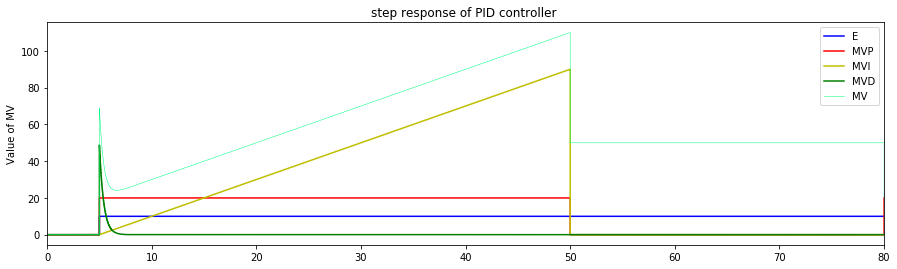

In [10]:
#first order with three methods

TSim = 80
Ts = 0.01
N = int(TSim/Ts) + 1

# Path for SP
SPPath = {0: 50, 5:50 , 50: 50, 80: 50, TSim: 50}

# Path for PV
PVPath = {0: 50, 5: 40, 50: 40, 80: 40, TSim: 40} #PV we let it constant

# Path for MAN
ManPath = {0: False, 5:False, 50: True, 80: True, TSim: False}

#path for MVMAN
MVManPath = {0: 50, 5:50 , 50: 50, 80: 50, TSim: 50}


# path for MVFF 
MVFFpath = {0: 0}


t = []

SP = []
SPDelay = []

PV = []
PVDelay = []

PV_EBD = []
PV_EFD = []
PV_TRAP = []

MVP=[]
MVI=[]
MVD=[]
MV=[]
E=[]
MVMan=[]
Man =[]
MVFF=[]

# Parameters
Kp = 1
T = 5
theta = 10
Ti = 10
Td = 1
alpha = 0.4
MVMin = 0
MVMax = 50

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVFFpath,t,MVFF)
    PID_RT(SP,PV,Man,MVMan,MVFF,2,Ti,Td,alpha,Ts,MVMin,MVMax,MV,MVP,MVI,MVD,E,False,0,'EBD_EBD')
    
    
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,E,'b-',label='E',where='post')
plt.step(t,MVP,'r-',label='MVP',where='post')
plt.step(t,MVI,'y-',label='MVI',where='post')
plt.step(t,MVD,'g-',label='MVD',where='post')
plt.step(t,MV,'springgreen',linewidth=0.5,label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('step response of PID controller ')
plt.legend(loc='best')
plt.xlim([0, TSim])
